# Spotify User Preference Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import StandardScaler

**Setup Gragh palettes**

In [2]:
# We set the Like to be orange, Dislike to be blue
orange_blue = ["#f25d07", "#19B5FE"]
palette = sns.color_palette(orange_blue)
sns.set_palette(palette)
sns.set_style("white")
%matplotlib inline

**Loading Dataset**

In [3]:
data = pd.read_csv("https://storage.googleapis.com/kaggle-datasets/1833/3172/data.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1518472876&Signature=qLChUix2fZ0%2FanZUhPVrJF%2Fc2krlH473cp2Db1ANFy4M0qlcRHic41lzAVCpFqURKFNrYcWHD%2FOPC%2FIoYy9%2FowHlC%2FEOhbhGQ85NqAB0npvyoVPkgJWUkRvJarpk9YytdrP3vGJTtg5buiGVerU1HAqEnnUfbh57ybDqw0jFHowBLTRTawC7AiX5DrtkZSeZkWL2FBBTmIZut9bpz3VpgyU5SSXcmCEqigzVT7hV%2BKGV12QlTkt9BLCddMZPrr4K6oKdZmmiSxdUjRgjc8rf83br1eRAAzJw704OabSpaRVQTVKXSBjN5QqkKk8CreMHVwPc%2FcnWDCmcqJkqMD0GAg%3D%3D")
### Drop the initial index
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
### A dataset of 2017 songs with attributes from Spotify's API. Each song is labeled "1" meaning the user like it and "0" for songs user don't like.
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


**Exploratory Data Analysis**
* Overall view of the difference between liked and disliked songs

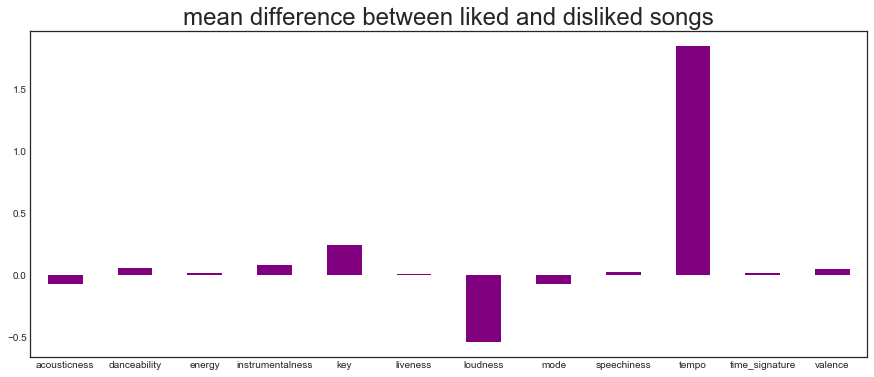

In [5]:
fig = plt.figure(figsize=(15, 6))
data_gb = data.groupby("target").mean()
data_gb = data_gb.transpose()
data_gb['difference'] = data_gb[1] - data_gb[0]

data_gb['difference'].drop('duration_ms').plot(kind = 'bar', color = 'purple')
plt.xticks(rotation=0)
plt.title('mean difference between liked and disliked songs', fontsize = 24)

* What is the sentiment distribution (like or not like) by each factor?

In [6]:
### split the data series based on target column
### 1 represents like, 0 represents dislike
tempo_like = data[data['target'] == 1]['tempo']
tempo_dislike = data[data['target'] == 0]['tempo']
dance_like = data[data['target'] == 1]['danceability']
dance_dislike = data[data['target'] == 0]['danceability']
duration_like = data[data['target'] == 1]['duration_ms']
duration_dislike = data[data['target'] == 0]['duration_ms']
loudness_like = data[data['target'] == 1]['loudness']
loudness_dislike = data[data['target'] == 0]['loudness']
speechiness_like = data[data['target'] == 1]['speechiness']
speechiness_dislike = data[data['target'] == 0]['speechiness']
valence_like = data[data['target'] == 1]['valence']
valence_dislike = data[data['target'] == 0]['valence']
energy_like = data[data['target'] == 1]['energy']
energy_dislike = data[data['target'] == 0]['energy']
acousticness_like = data[data['target'] == 1]['acousticness']
acousticness_dislike = data[data['target'] == 0]['acousticness']
key_like = data[data['target'] == 1]['key']
key_dislike = data[data['target'] == 0]['key']
instrumentalness_like = data[data['target'] == 1]['instrumentalness']
instrumentalness_dislike = data[data['target'] == 0]['instrumentalness']

Let's visualize one factor distribution.

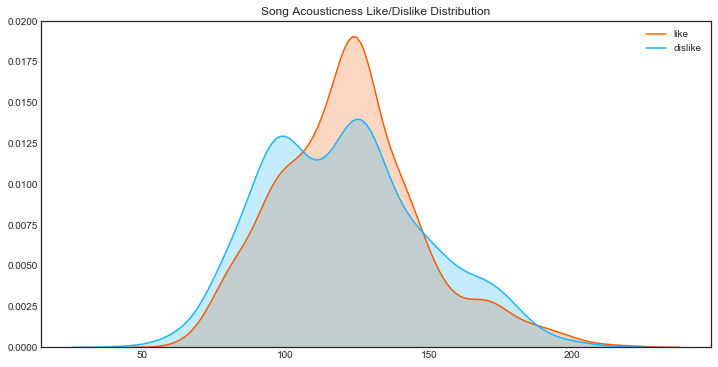

In [7]:
fig = plt.figure(figsize=(12, 6))
plt.title("Song Acousticness Like/Dislike Distribution")
sns.kdeplot(tempo_like, shade = True, label = 'like')
sns.kdeplot(tempo_dislike, shade = True, label = 'dislike')
plt.legend(loc="upper right")

Let's visualize more.

In [8]:
def plot_distribution():
    fig = plt.figure(figsize = (16,15))

    # Danceability
    ax1 = fig.add_subplot(331)
    plt.title("Danceability")
    sns.kdeplot(dance_like, shade = True)
    sns.kdeplot(dance_dislike, shade = True)
    ax1.legend().set_visible(False)

    # Duration_ms
    ax2 = fig.add_subplot(332)
    plt.title("Duration")
    sns.kdeplot(duration_like, shade = True)
    sns.kdeplot(duration_dislike, shade = True)
    ax2.legend().set_visible(False)

    # Energy
    ax3 = fig.add_subplot(333)
    plt.title("Energy")
    sns.kdeplot(energy_like, shade = True)
    sns.kdeplot(energy_dislike, shade = True)
    ax3.legend().set_visible(False)

    # Instrumentalness
    ax4 = fig.add_subplot(334)
    plt.title("Instrumentalness")
    sns.kdeplot(instrumentalness_like, shade = True)
    sns.kdeplot(instrumentalness_dislike, shade = True)
    ax4.legend().set_visible(False)

    #Key
    ax5 = fig.add_subplot(335)
    plt.title("Key")
    sns.kdeplot(key_like, shade = True)
    sns.kdeplot(key_dislike, shade = True)
    ax5.legend().set_visible(False)

    # Loudness
    ax6 = fig.add_subplot(336)
    plt.title("Loudness")
    sns.kdeplot(loudness_like, shade = True)
    sns.kdeplot(loudness_dislike, shade = True)
    ax6.legend().set_visible(False)

    # Speechiness
    ax7 = fig.add_subplot(337)
    plt.title("Speechiness")
    sns.kdeplot(speechiness_like, shade = True)
    sns.kdeplot(speechiness_dislike, shade = True)
    ax7.legend().set_visible(False)

    # Tempo
    ax8 = fig.add_subplot(338)
    plt.title("Tempo")
    sns.kdeplot(tempo_like, shade = True)
    sns.kdeplot(tempo_dislike, shade = True)
    ax8.legend().set_visible(False)

    # Valence
    ax9 = fig.add_subplot(339)
    plt.title("Valence")
    sns.kdeplot(valence_like, shade = True)
    sns.kdeplot(valence_dislike, shade = True)
    ax9.legend().set_visible(False)

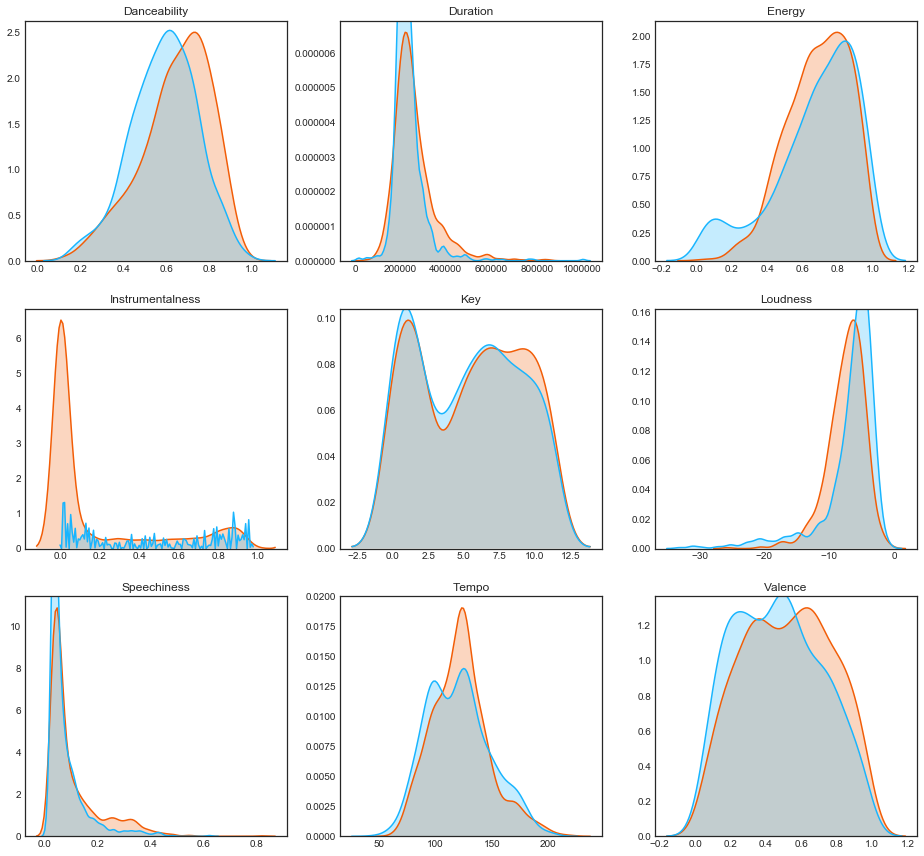

In [9]:
plot_distribution()

* What is the correlation between each factor?

In [10]:
def plot_corr_heatmap():
    fig = plt.figure(figsize = (22,15))
    plt.title("Spotify Attributes Correlation Heatmap", fontsize = 20)
    corr = data.corr()
    sns.heatmap(corr, cmap = "YlGnBu")
    plt.xticks(rotation = 0)

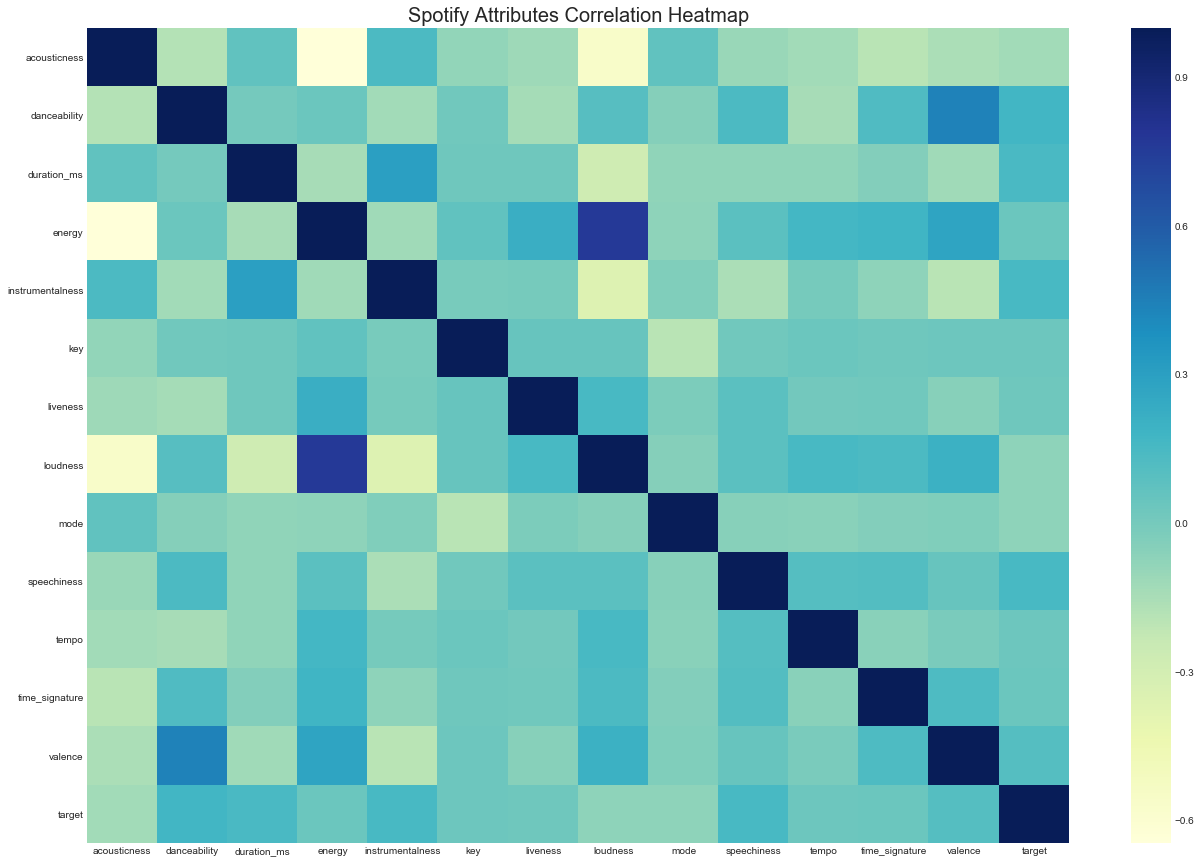

In [11]:
plot_corr_heatmap()

**Feature preparation, engineering and selection**

In [12]:
# Create modeling dataset
df = data.copy()

In [13]:
# Check NA valus
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

* Feature Preparation 
    - Scale numerical features

In [14]:
# Classify key, numerical and categorical features
key = 'song_title'
cat_cols = ['key','mode','time_signature']
num_cols = list(df.columns.drop(cat_cols).drop(key).drop('target').drop('artist'))
print(" Key column is {}".format(key), "\n", "\n","Categorical columns are {}".format(cat_cols),"\n", "\n","Numerical columns are {}".format(num_cols))

 Key column is song_title 
 
 Categorical columns are ['key', 'mode', 'time_signature'] 
 
 Numerical columns are ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


In [15]:
# Scale the numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,2,-0.166291,-0.454530,1,3.763084,1.066709,4.0,-0.853039,1,Mask Off,Future
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,1,-0.346454,-0.881573,1,-0.147529,1.442323,4.0,0.368970,1,Redbone,Childish Gambino
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,2,-0.204897,-0.016586,1,2.183712,-1.745166,4.0,-1.310280,1,Xanny Family,Future
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,5,-0.634715,-2.167220,1,-0.740350,-1.316964,4.0,-1.079636,1,Master Of None,Beach House
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,5,1.596735,-1.213155,0,-0.258753,1.964120,4.0,1.647627,1,Parallel Lines,Junior Boys


* Feature Engineering 
    - Create dummy variables for categorical features

In [16]:
# Create dummy variables
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df,dummies], axis = 1)
    df = df.drop(col, axis = 1)
    return df

for col in cat_cols:
    df = create_dummies(df,col)

df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_8,key_9,key_10,key_11,mode_0,mode_1,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.166291,-0.454530,3.763084,1.066709,-0.853039,...,0,0,0,0,0,1,0,0,1,0
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-0.346454,-0.881573,-0.147529,1.442323,0.368970,...,0,0,0,0,0,1,0,0,1,0
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.204897,-0.016586,2.183712,-1.745166,-1.310280,...,0,0,0,0,0,1,0,0,1,0
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.634715,-2.167220,-0.740350,-1.316964,-1.079636,...,0,0,0,0,0,1,0,0,1,0
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,1.596735,-1.213155,-0.258753,1.964120,1.647627,...,0,0,0,0,1,0,0,0,1,0


* Feature Selection
    - Recursive feature elimination with cross-validation

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# Define Seed for reproductability of the project
Seed = 1

all_X = df.select_dtypes([np.number]).drop(["target"], axis = 1)
all_y = df["target"]

clf = RandomForestClassifier(random_state = Seed)
selector = RFECV(clf, cv = 10)
selector.fit(all_X, all_y)

best_columns_rf = list(all_X.columns[selector.support_])
print(best_columns_rf)

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key_0', 'key_1', 'key_2', 'key_6', 'key_7', 'key_9', 'key_11', 'mode_0', 'mode_1']


In [18]:
from sklearn.ensemble import AdaBoostClassifier
# select numerical columns and remove columns with null value
clf = AdaBoostClassifier(random_state = Seed)
selector = RFECV(clf, cv = 10)
selector.fit(all_X, all_y)

best_columns_ab = list(all_X.columns[selector.support_])
print(best_columns_ab)

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_0', 'mode_1', 'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0', 'time_signature_5.0']


**Modeling**


In [19]:
# Split train and test dataset
from sklearn.model_selection import train_test_split
# Define feature, target columns
X = df[best_columns_rf]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = Seed, stratify = y)

* Decision Tree

In [20]:
# Let's visualize decision tree using the following function
import pydotplus  
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def print_graph(clf, feature_names):
    """Print decision tree."""
    graph = export_graphviz(
        clf,
        label="root",
        proportion=True,
        impurity=False, 
        out_file=None, 
        feature_names=feature_names,
        class_names={0: "Dislike", 1: "Like"},
        filled=True,
        rounded=True
    )
    graph = pydotplus.graph_from_dot_data(graph)  
    return Image(graph.create_png())

Decision tree ROC-AUC score: 0.643



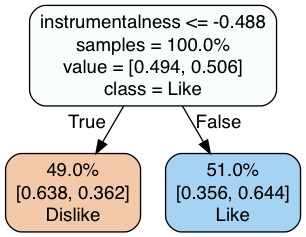

In [21]:
# Fit a decision tree with a single node
t1 = DecisionTreeClassifier(max_depth=1, random_state=Seed)
t1.fit(X_train, y_train)
p = t1.predict_proba(X_test)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(y_test, p))
print_graph(t1, X_train.columns)

In [22]:
# Let's use three levels of decision rules and see what we can get
t2 = DecisionTreeClassifier(max_depth=3, random_state=Seed)
t2.fit(X_train, y_train)
p = t2.predict_proba(X_test)[:, 1]

Decision tree ROC-AUC score: 0.750



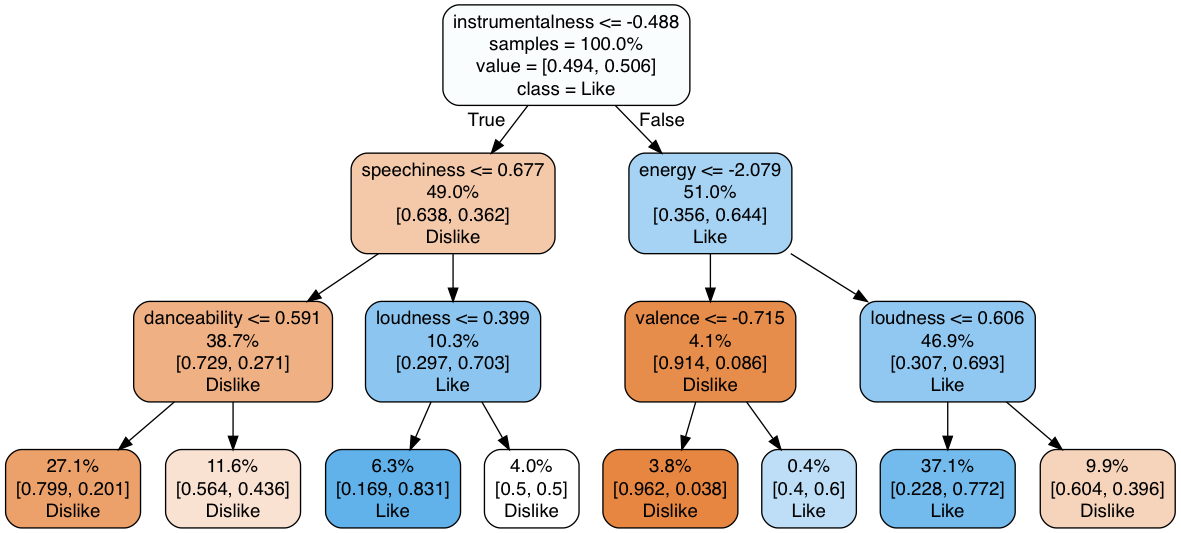

In [23]:
print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(y_test, p))
print_graph(t2, X_train.columns)

In [24]:
# Remove the root of the tree
drop = ["instrumentalness"]

xtrain_slim = X_train.drop(drop, 1)
xtest_slim = X_test.drop(drop, 1)

t3 = DecisionTreeClassifier(max_depth=3, random_state=Seed)
t3.fit(xtrain_slim, y_train)
p = t3.predict_proba(xtest_slim)[:, 1]

Decision tree ROC-AUC score: 0.706



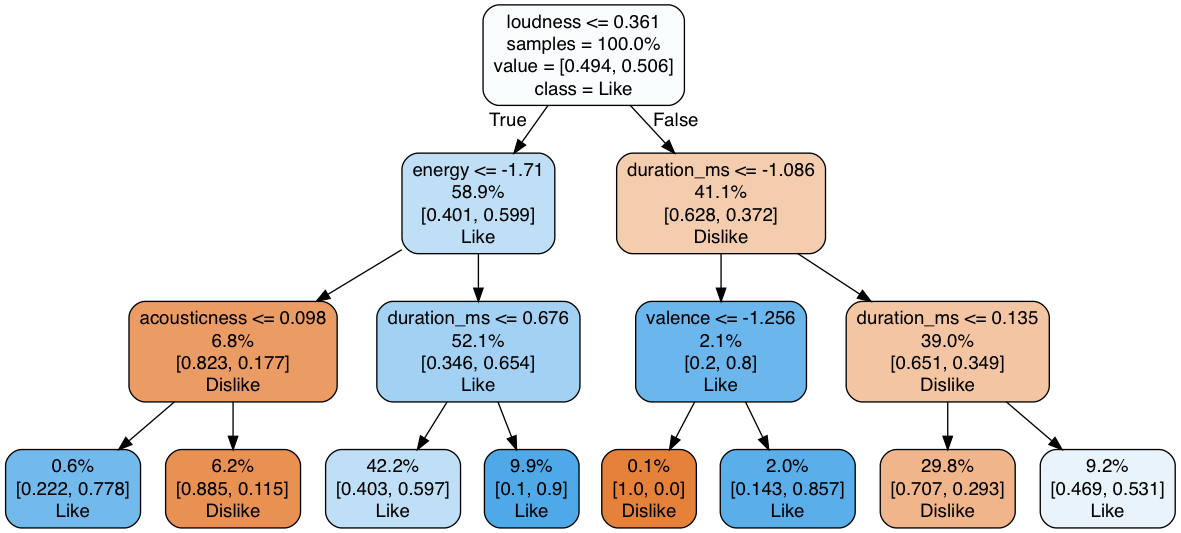

In [25]:
print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(y_test, p))
print_graph(t3, xtrain_slim.columns)

In [26]:
# Correlation between two predictions
p1 = t2.predict_proba(X_test)[:, 1]
p2 = t3.predict_proba(xtest_slim)[:, 1]

pd.DataFrame({"full_data": p1,
              "red_data": p2}).corr()

### If correlation not too high, the aggregated result can be more neutral.

,full_data,red_data
full_data,1.000000,0.458766
red_data,0.458766,1.000000


In [27]:
### Average the probability to create an aggregated prediction
p1 = t2.predict_proba(X_test)[:, 1]
p2 = t3.predict_proba(xtest_slim)[:, 1]
p = np.mean([p1, p2], axis=0)
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(y_test, p))

Average of decision tree ROC-AUC score: 0.780


Let's create a forest that contains 10 trees.

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10,
    max_features=3,
    random_state=Seed
)

rf.fit(X_train, y_train)
p = rf.predict_proba(X_test)[:, 1]
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(y_test, p))

Average of decision tree ROC-AUC score: 0.819


Let's see what other models can do.

In [29]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline


def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=Seed)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=Seed)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=Seed)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=Seed)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [30]:
models = get_models()
P = train_predict(models)
score_models(P, y_test)

Fitting models.
svm... done
knn... done
naive bayes... done
mlp-nn... done
random forest... done
gbm... done
logistic... done
Done.

Scoring models.
svm                       : 0.790
knn                       : 0.734
naive bayes               : 0.651
mlp-nn                    : 0.815
random forest             : 0.819
gbm                       : 0.848
logistic                  : 0.687
Done.



In [31]:
### One way to aggregate is to take the average of the probability.

print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(y_test, P.mean(axis=1)))

Ensemble ROC-AUC score: 0.827


In [32]:
### The other way to aggregate is to take the mode of the label.

P_label = P.apply(lambda pred: 1*(pred >= 0.5))
print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(y_test, P_label.mode(axis=1)))

Ensemble ROC-AUC score: 0.756


[MLENS] backend: threading


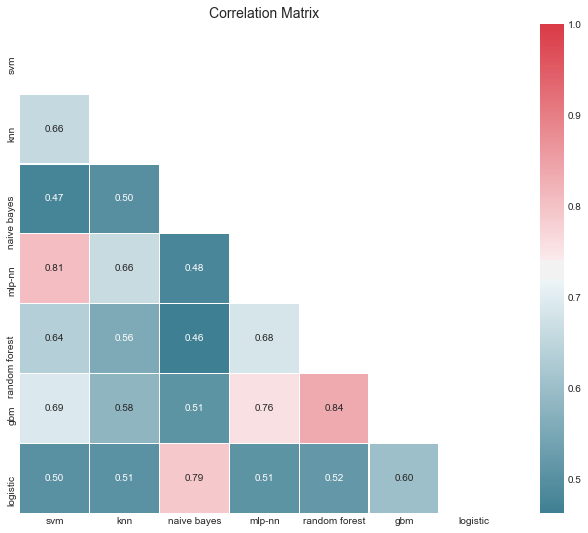

In [33]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)
plt.show()

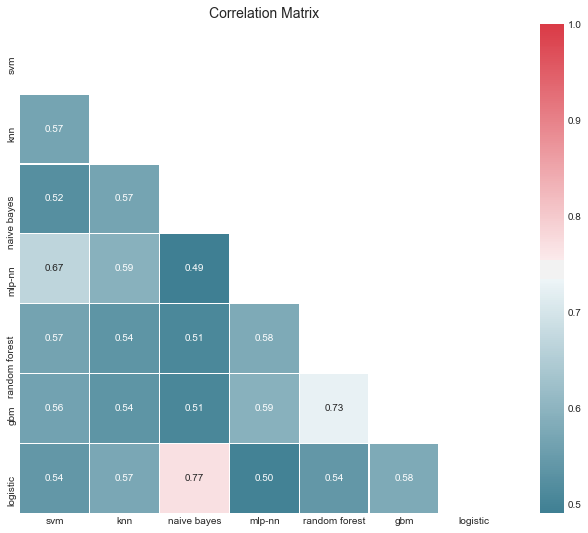

In [34]:
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - y_test.values).corr(), inflate=False)
plt.show()

Let's reduce the number of models.

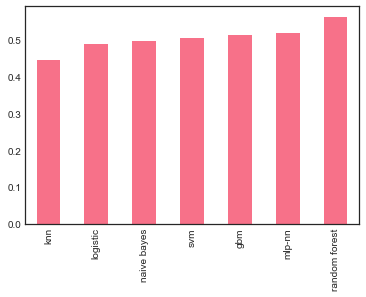

In [35]:
p = P.apply(lambda x: 1*(x >= 0.5).value_counts(normalize=True))
p.index = ["Dislike", "Like"]
p.loc["Like", :].sort_values().plot(kind="bar")
plt.show()

In [36]:
include = [c for c in P.columns if c not in ["knn", "svm","logistic", "naive bayes"]]
print("Truncated ensemble ROC-AUC score: %.3f" % roc_auc_score(y_test, P.loc[:, include].mean(axis=1)))

Truncated ensemble ROC-AUC score: 0.857


# Thank you!